**This notebook guides you through the ISLES24 data loading, visualization, and segmentation performance evaluation.**

This is an **example** case. In the challenge, the same metrics and implementations are used. Lesions masks are gonna be masked using an NCCT-derived brain mask. 

In [1]:
# imports.
import nibabel as nib
import numpy as np
import os
from matplotlib import pyplot as plt
import eval_utils

In [2]:
''' We'll generate a basic infarct segmentation algorithm by thresholding the (already-preprocessed) Tmax parameter map.  '''

# paths.
isles_data_dir = 'data/'
example_case = 14 

# Set images path.
tmax_path = os.path.join(isles_data_dir, 'derivatives', 'sub-stroke{}'.format("%04d" %example_case), 'ses-01', 'perfusion-maps',
                    'sub-stroke{}_ses-01_space-ncct_tmax.nii.gz'.format("%04d" % example_case)) #path-to-tmax
gt_path = os.path.join(isles_data_dir, 'derivatives', 'sub-stroke{}'.format("%04d" %example_case), 'ses-02', 
                    'sub-stroke{}_ses-02_lesion-msk.nii.gz'.format("%04d" % example_case)) #path-to-ground-truth

In [3]:
# Load image data.
tmax_image = nib.load(tmax_path).get_fdata()
gt_image = nib.load(gt_path).get_fdata()

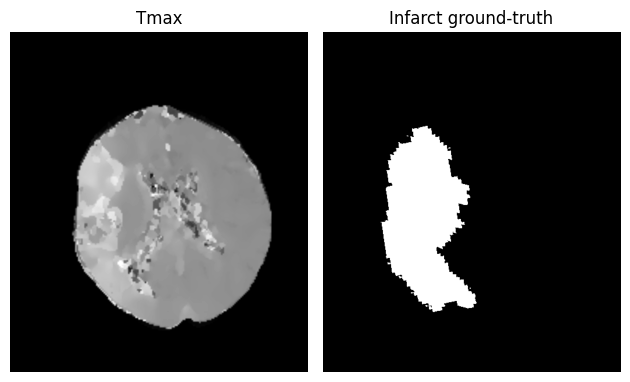

In [4]:
# Lets visualize Tmax parameter-map with its corresponding infarct ground-truth.

fig, (ax1, ax2) = plt.subplots(1, 2)

slice2show=40

# Show Tmax image
ax1.imshow(np.rot90(tmax_image[:,:,slice2show]), cmap='gray')
#ax1.imshow(mask_image[:,:,slice2show], alpha=0.5, cmap='copper')
ax1.set_title('Tmax')
ax1.set_axis_off()

# Show segmentation mask.
ax2.imshow(np.rot90(gt_image[:,:,slice2show]), cmap='gray')
#ax3.imshow(mask_image[:,:,slice2show], alpha=0.5, cmap='copper')
ax2.set_title('Infarct ground-truth')
ax2.set_axis_off()
plt.tight_layout()
plt.show()

In [5]:
# As an example, we'll segment Tmax by using a cutoff at 9 seconds.
cutoff = 9
segmented_image = tmax_image > cutoff

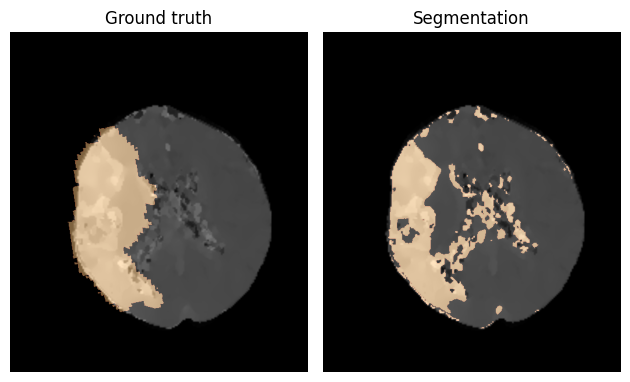

In [6]:
# Lets visualize the segmentation we've created.
# Show ground truth.
fig2, (ax1, ax2) = plt.subplots(1, 2)

ax1.imshow(np.rot90(tmax_image[:,:,slice2show]), cmap='gray')
ax1.imshow(np.rot90(gt_image[:,:,slice2show]), alpha=0.5, cmap='copper')
ax1.set_title('Ground truth')
ax1.set_axis_off()

# Show predicted segmentation.
ax2.imshow(np.rot90(tmax_image[:,:,slice2show]), cmap='gray')
ax2.imshow(np.rot90(segmented_image[:,:,slice2show]), alpha=0.5, cmap='copper')
ax2.set_title('Segmentation')
ax2.set_axis_off()
plt.tight_layout()
plt.show()

In [7]:
# Compute performance metrics.

# Compute F1-score, lesion count difference and Dice/
f1, lcd, dice = eval_utils.compute_dice_f1_instance_difference(gt_image, segmented_image)
print('Absolute lesion count difference: {} '.format(lcd))
print('Lesion-wise F1-score: {} '.format(f1))
print('Dice-score: {} '.format(dice))

# Compute absolute volume difference
voxel_volume = np.prod(nib.load(gt_path).header.get_zooms())/1000 # Get voxel volume
print('Absolute volume difference: {} ml'.format(eval_utils.compute_absolute_volume_difference(gt_image, segmented_image, voxel_volume)))



────────────────────────────────────────── Thank you for using panoptica ──────────────────────────────────────────

Please support our development by citing

https://github.com/BrainLesion/panoptica#citation -- Thank you!

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Absolute lesion count difference: 238 
Lesion-wise F1-score: 0.1111111111111111 
Dice-score: 0.559318913793918 
Absolute volume difference: 84.37381298828123 ml
